In [1]:
import pandas as pd
import glob

# Directory where the generated files are stored
directory = "VolumeData"

# Step 1: Load all files
file_pattern = f"{directory}/spice_price_data_*.csv"
file_list = glob.glob(file_pattern)

# Step 2: Process each file
dataframes = []
for file in file_list:
    df = pd.read_csv(file)

    # Convert 'Price Date' column to datetime
    if 'Reported Date' in df.columns:
        df['Reported Date'] = pd.to_datetime(df['Reported Date'], errors='coerce')

    # Filter rows where Variety is 'White'
    if 'Variety' in df.columns:
        df = df[df['Variety'].str.contains("White", na=False)]

    # Append to the list of dataframes
    dataframes.append(df)

# Step 3: Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Step 4: Save the combined dataframe to a new CSV file
output_file = f"{directory}/combined_spice_price_data.csv"
combined_df.to_csv(output_file, index=False)

print(f"Combined file saved as {output_file}")


Combined file saved as VolumeData/combined_spice_price_data.csv


In [2]:
import pandas as pd
df = pd.read_csv("VolumeData/combined_spice_price_data.csv")

In [3]:
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Gujarat,Amreli,Amreli,White,Oil Seeds,7.60,8500,10005,9375,2020-01-27
1,Gujarat,Amreli,Amreli,White,Oil Seeds,8.10,7250,10105,9130,2020-03-05
2,Gujarat,Amreli,Amreli,White,Oil Seeds,9.40,8750,10725,10525,2020-01-17
3,Gujarat,Amreli,Amreli,White,Oil Seeds,10.00,8590,10825,10000,2020-01-18
4,Gujarat,Amreli,Amreli,White,Oil Seeds,13.90,7800,9805,8725,2020-03-09
...,...,...,...,...,...,...,...,...,...,...
33214,Karnataka,Bangalore,Bangalore,White,Oil Seeds,10.00,16000,19000,17500,2024-11-08
33215,Karnataka,Koppal,Kustagi,White,Oil Seeds,5.00,11000,11000,11000,2024-11-11
33216,Madhya Pradesh,Panna,Ajaygarh,White,Oil Seeds,15.65,10370,10600,10400,2024-11-12
33217,Maharashtra,Amarawati,Amarawati,White,Oil Seeds,0.30,10500,11000,10750,2024-11-06


In [4]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'], errors='coerce')

# Step 3: Sort the DataFrame by 'Price Date' in ascending order
df_sorted = df.sort_values(by='Reported Date', ascending=True)
df_sorted

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
29265,Gujarat,Gandhinagar,Mansa,White,Oil Seeds,0.06,10750,11355,10900,2019-01-01
31180,Uttar Pradesh,Kanpur Dehat,Jhijhank,White,Oil Seeds,0.50,6049,6249,6149,2019-01-01
32274,Uttar Pradesh,Hamirpur,Muskara,White,Oil Seeds,3.00,10600,11300,11000,2019-01-01
24973,Gujarat,Amreli,Amreli,White,Oil Seeds,10.00,6500,13435,12860,2019-01-01
25011,Gujarat,Amreli,Rajula,White,Oil Seeds,0.20,11270,12500,11885,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
19042,Gujarat,Botad,Botad,White,Oil Seeds,7925,10575,9250,17 Jan 2022,NaT
33013,Madhya Pradesh,Katni,Katni,White,Oil Seeds,9400,10400,10400,07 Nov 2024,NaT
33037,Gujarat,Rajkot,Rajkot,White,Oil Seeds,10000,13500,11600,09 Nov 2024,NaT
33070,Gujarat,Amreli,Babra,White,Oil Seeds,9950,11500,10725,12 Nov 2024,NaT


In [5]:
df_sorted.columns

Index(['State Name', 'District Name', 'Market Name', 'Variety', 'Group',
       'Arrivals (Tonnes)', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)',
       'Reported Date'],
      dtype='object')

In [6]:
df = df_sorted.copy()

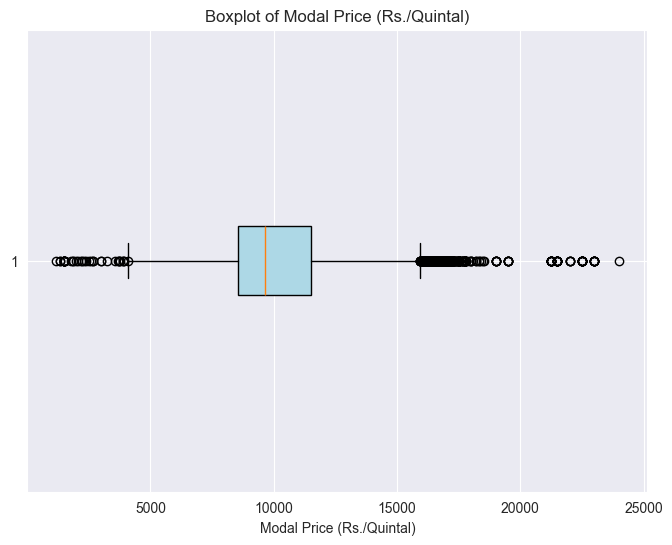

Lower Bound: 4100.0, Upper Bound: 15940.0
Cleaned file saved as VolumeData/cleaned_spice_price_data.csv
Original data size: 33206 rows
Cleaned data size: 32348 rows


In [7]:
import matplotlib.pyplot as plt
# Step 2: Convert 'Modal Price (Rs./Quintal)' to numeric, coercing errors to NaN
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')
output_file = "VolumeData/cleaned_spice_price_data.csv"
# Step 3: Remove any rows with NaN values in 'Modal Price (Rs./Quintal)'
df = df.dropna(subset=['Modal Price (Rs./Quintal)'])

# Step 4: Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Modal Price (Rs./Quintal)'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Modal Price (Rs./Quintal)')
plt.xlabel('Modal Price (Rs./Quintal)')
plt.show()

# Step 5: Identify outliers using IQR method
Q1 = df['Modal Price (Rs./Quintal)'].quantile(0.25)
Q3 = df['Modal Price (Rs./Quintal)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Step 6: Filter out rows with outliers
df_cleaned = df[(df['Modal Price (Rs./Quintal)'] >= lower_bound) & (df['Modal Price (Rs./Quintal)'] <= upper_bound)]

# Step 7: Save cleaned DataFrame
df_cleaned.to_csv(output_file, index=False)
print(f"Cleaned file saved as {output_file}")

# Summary
print(f"Original data size: {len(df)} rows")
print(f"Cleaned data size: {len(df_cleaned)} rows")

Correlation between Volume and Modal Price (after removing outliers): 0.02


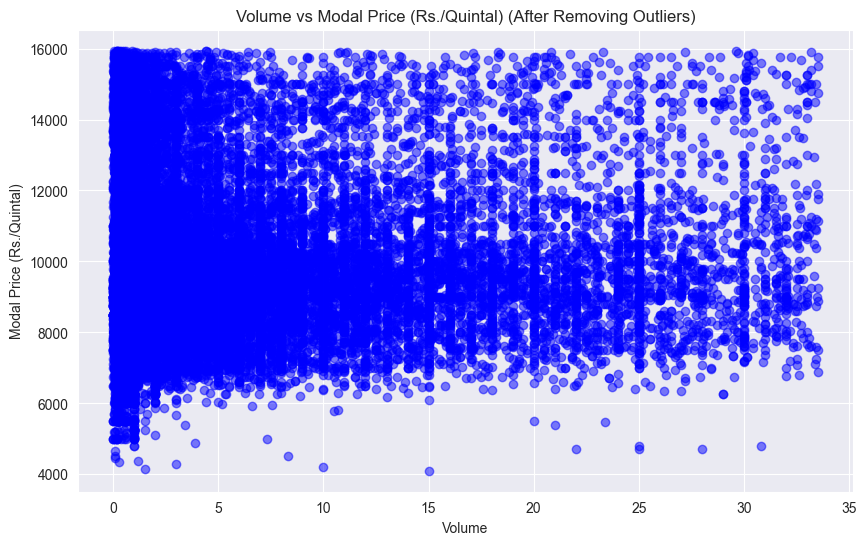

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the cleaned data
file_path = "VolumeData/cleaned_spice_price_data.csv"
df = pd.read_csv(file_path)

# Step 2: Clean up columns to ensure they are in numeric format
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].replace({',': ''}, regex=True).astype(float)
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].replace({',': ''}, regex=True).astype(float)

# Step 3: Calculate the IQR for 'Arrivals (Tonnes)'
Q1 = df['Arrivals (Tonnes)'].quantile(0.25)
Q3 = df['Arrivals (Tonnes)'].quantile(0.75)
IQR = Q3 - Q1

# Step 4: Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Remove rows with outliers in 'Arrivals (Tonnes)'
df_cleaned = df[(df['Arrivals (Tonnes)'] >= lower_bound) & (df['Arrivals (Tonnes)'] <= upper_bound)]

# Step 6: Check if the columns 'Arrivals (Tonnes)' and 'Modal Price (Rs./Quintal)' exist
if 'Arrivals (Tonnes)' in df_cleaned.columns and 'Modal Price (Rs./Quintal)' in df_cleaned.columns:
    # Step 7: Calculate the correlation between 'Volume' and 'Modal Price (Rs./Quintal)'
    correlation = df_cleaned['Arrivals (Tonnes)'].corr(df_cleaned['Modal Price (Rs./Quintal)'])
    print(f"Correlation between Volume and Modal Price (after removing outliers): {correlation:.2f}")

    # Step 8: Plot Volume vs Modal Price
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned['Arrivals (Tonnes)'], df_cleaned['Modal Price (Rs./Quintal)'], color='blue', alpha=0.5)
    plt.title('Volume vs Modal Price (Rs./Quintal) (After Removing Outliers)')
    plt.xlabel('Volume')
    plt.ylabel('Modal Price (Rs./Quintal)')
    plt.grid(True)
    plt.show()

else:
    print("Columns 'Arrivals (Tonnes)' or 'Modal Price (Rs./Quintal)' not found in the dataset.")


In [9]:
!pip install dcor


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Spearman's Rank Correlation: 0.03
Kendall's Tau Correlation: 0.02
Distance Correlation: 0.06
Mutual Information: 0.12


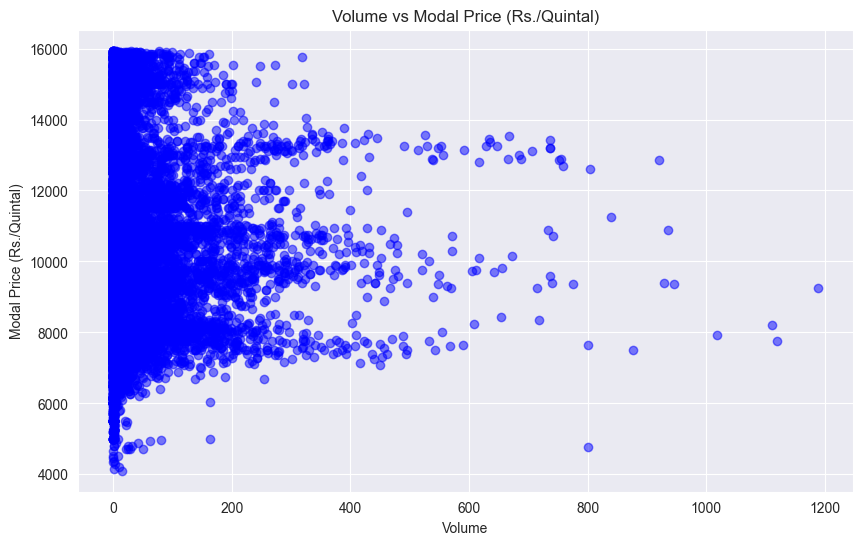

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
from dcor import distance_correlation
from sklearn.feature_selection import mutual_info_regression

# Step 1: Load the cleaned data
file_path = "VolumeData/cleaned_spice_price_data.csv"
df = pd.read_csv(file_path)

# Step 2: Clean up columns to ensure they are in numeric format
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].replace({',': ''}, regex=True).astype(float)
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].replace({',': ''}, regex=True).astype(float)

# Step 3: Calculate Spearman's Rank Correlation
spearman_corr, _ = spearmanr(df['Arrivals (Tonnes)'], df['Modal Price (Rs./Quintal)'])
print(f"Spearman's Rank Correlation: {spearman_corr:.2f}")

# Step 4: Calculate Kendall's Tau Correlation
kendall_corr, _ = kendalltau(df['Arrivals (Tonnes)'], df['Modal Price (Rs./Quintal)'])
print(f"Kendall's Tau Correlation: {kendall_corr:.2f}")

# Step 5: Calculate Distance Correlation
distance_corr = distance_correlation(df['Arrivals (Tonnes)'], df['Modal Price (Rs./Quintal)'])
print(f"Distance Correlation: {distance_corr:.2f}")

# Step 6: Calculate Mutual Information
# Reshape the data for mutual_info_regression, which expects a 2D array for the features
X = df[['Arrivals (Tonnes)']]
y = df['Modal Price (Rs./Quintal)']
mutual_info = mutual_info_regression(X, y)
print(f"Mutual Information: {mutual_info[0]:.2f}")

# Step 7: Plot Volume vs Modal Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Arrivals (Tonnes)'], df['Modal Price (Rs./Quintal)'], color='blue', alpha=0.5)
plt.title('Volume vs Modal Price (Rs./Quintal)')
plt.xlabel('Volume')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
df = pd.read_csv("VolumeData/cleaned_spice_price_data.csv")
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
print(df.isnull().sum())  # Check for missing values

# Option 1: Drop rows with missing values
df.dropna(subset=['Modal Price (Rs./Quintal)', 'Arrivals (Tonnes)'], inplace=True)
df['Volume_X_Price'] = df['Modal Price (Rs./Quintal)'] * df['Arrivals (Tonnes)']



State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            4
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64


In [12]:
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Volume_X_Price
0,Gujarat,Gandhinagar,Mansa,White,Oil Seeds,0.06,10750,11355,10900.0,2019-01-01,654.0
1,Uttar Pradesh,Kanpur Dehat,Jhijhank,White,Oil Seeds,0.50,6049,6249,6149.0,2019-01-01,3074.5
2,Uttar Pradesh,Hamirpur,Muskara,White,Oil Seeds,3.00,10600,11300,11000.0,2019-01-01,33000.0
3,Gujarat,Amreli,Amreli,White,Oil Seeds,10.00,6500,13435,12860.0,2019-01-01,128600.0
4,Gujarat,Amreli,Rajula,White,Oil Seeds,0.20,11270,12500,11885.0,2019-01-01,2377.0
...,...,...,...,...,...,...,...,...,...,...,...
32343,Gujarat,Bhavnagar,Mahuva(Station Road),White,Oil Seeds,3.00,9000,13240,11500.0,2024-11-13,34500.0
32344,Uttar Pradesh,Jalaun (Orai),Orai,White,Oil Seeds,20.00,10800,11500,11000.0,2024-11-13,220000.0
32345,Uttar Pradesh,Jalaun (Orai),Jalaun,White,Oil Seeds,10.00,10800,11500,11200.0,2024-11-13,112000.0
32346,Gujarat,Amreli,Bagasara,White,Oil Seeds,0.80,11075,11650,11362.0,2024-11-13,9089.6


In [13]:
df.to_csv("VolumeData/Multiple.csv")

In [14]:
max_market_name = df['Market Name'].value_counts().idxmax()
filtered_df = df[df['Market Name'] == max_market_name]
print(f"Most frequent Market Name: {max_market_name}")
print(filtered_df)


Most frequent Market Name: Rajkot
      State Name District Name Market Name Variety      Group  \
19       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
46       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
81       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
114      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
132      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
...          ...           ...         ...     ...        ...   
32192    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32213    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32266    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32316    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32342    Gujarat        Rajkot      Rajkot   White  Oil Seeds   

       Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
19                  30.0                    10800                    12810   
46                  98.0     

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Normalize Volume_X_Price, Modal Price, and Arrivals (Tonnes)
scaler = MinMaxScaler()
filtered_df['Normalized_Volume_X_Price'] = scaler.fit_transform(filtered_df[['Volume_X_Price']])
filtered_df['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df[['Modal Price (Rs./Quintal)']])
filtered_df['Normalized_Volume_Price'] = scaler.fit_transform(filtered_df[['Arrivals (Tonnes)']])


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/734031838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Normalized_Volume_X_Price'] = scaler.fit_transform(filtered_df[['Volume_X_Price']])
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/734031838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df[['Modal Price (Rs./Quintal)']])
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykern

In [16]:
start_date = '2023-10-31'
end_date = '2024-10-31'

# Filter the DataFrame for rows within the date range
filtered_df1 = filtered_df[
    (filtered_df['Reported Date'] >= start_date) &
    (filtered_df['Reported Date'] <= end_date)
    ]

start_date = '2022-10-31'
end_date = '2023-10-31'

filtered_df2 = filtered_df[
    (filtered_df['Reported Date'] >= start_date) &
    (filtered_df['Reported Date'] <= end_date)
    ]

start_date = '2021-10-31'
end_date = '2022-10-31'
filtered_df3 = filtered_df[
    (filtered_df['Reported Date'] >= start_date) &
    (filtered_df['Reported Date'] <= end_date)
    ]

start_date = '2020-10-31'
end_date = '2021-10-31'
filtered_df4 = filtered_df[
    (filtered_df['Reported Date'] >= start_date) &
    (filtered_df['Reported Date'] <= end_date)
    ]

start_date = '2019-10-31'
end_date = '2020-10-31'
filtered_df5 = filtered_df[
    (filtered_df['Reported Date'] >= start_date) &
    (filtered_df['Reported Date'] <= end_date)
    ]
# Display the result
print(filtered_df)


      State Name District Name Market Name Variety      Group  \
19       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
46       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
81       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
114      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
132      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
...          ...           ...         ...     ...        ...   
32192    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32213    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32266    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32316    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
32342    Gujarat        Rajkot      Rajkot   White  Oil Seeds   

       Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
19                  30.0                    10800                    12810   
46                  98.0                    10755              

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2618006251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Reported Date'] = pd.to_datetime(filtered_df1['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2618006251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2618006251.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

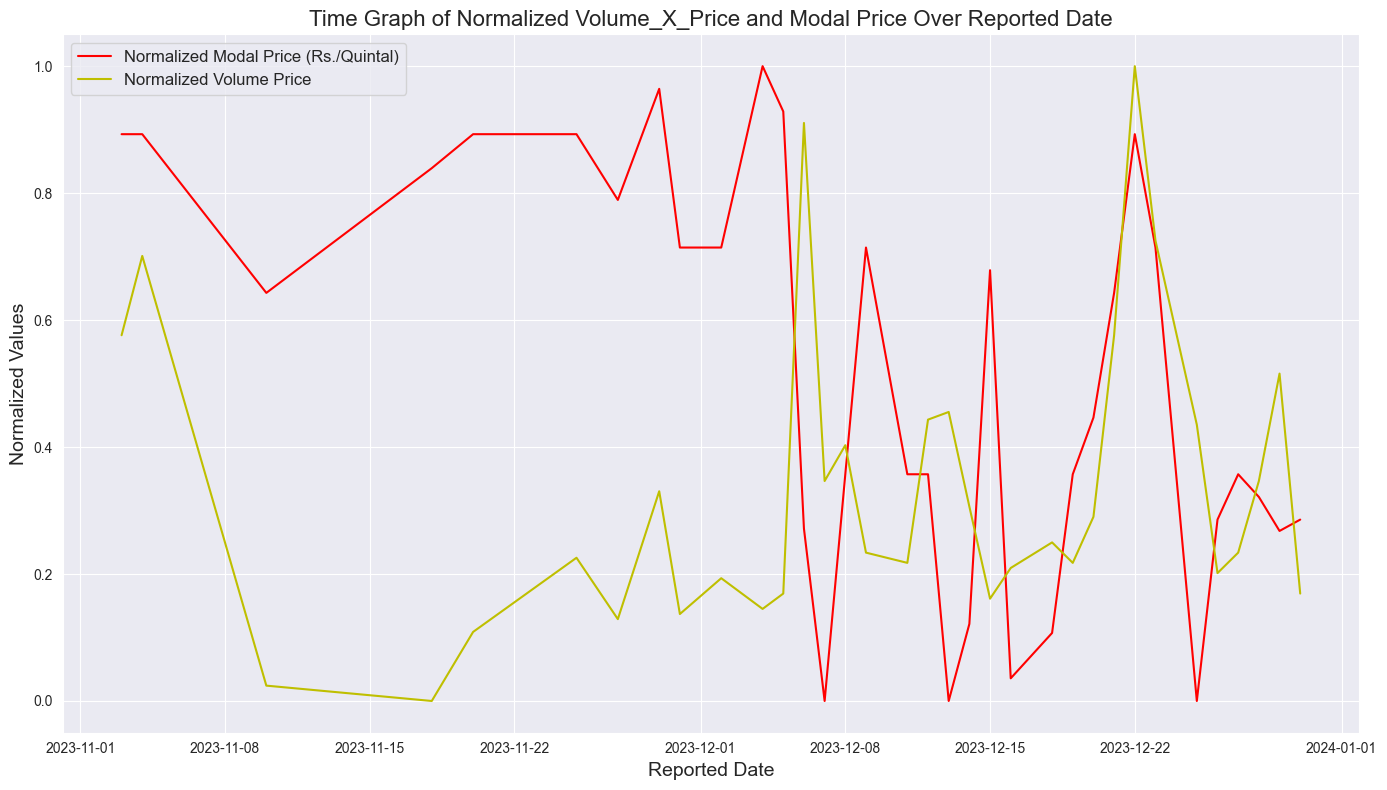

In [17]:
import matplotlib.pyplot as plt

# Ensure Reported Date is in datetime format
filtered_df1['Reported Date'] = pd.to_datetime(filtered_df1['Reported Date'], errors='coerce')

# Drop rows where Reported Date might have failed to convert
filtered_df1.dropna(subset=['Reported Date'], inplace=True)

# Sort by date for proper plotting
filtered_df1.sort_values(by='Reported Date', inplace=True)
# Set figure size
plt.figure(figsize=(14, 8))  # Width = 14, Height = 8
filtered_df1['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df1[['Modal Price (Rs./Quintal)']])
filtered_df1['Normalized_Volume_Price'] = scaler.fit_transform(filtered_df1[['Arrivals (Tonnes)']])

# Plot Reported Date vs Normalized Modal Price
plt.plot(
    filtered_df1['Reported Date'],
    filtered_df1['Normalized_Modal_Price'], color='r',
    label='Normalized Modal Price (Rs./Quintal)'
)
plt.plot(
    filtered_df1['Reported Date'],
    filtered_df1['Normalized_Volume_Price'], color='y',
    label='Normalized Volume Price'
)

# Add title and labels
plt.title('Time Graph of Normalized Volume_X_Price and Modal Price Over Reported Date', fontsize=16)
plt.xlabel('Reported Date', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Optimize layout and show
plt.tight_layout()
plt.show()


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2229434870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Reported Date'] = pd.to_datetime(filtered_df2['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2229434870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/2229434870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

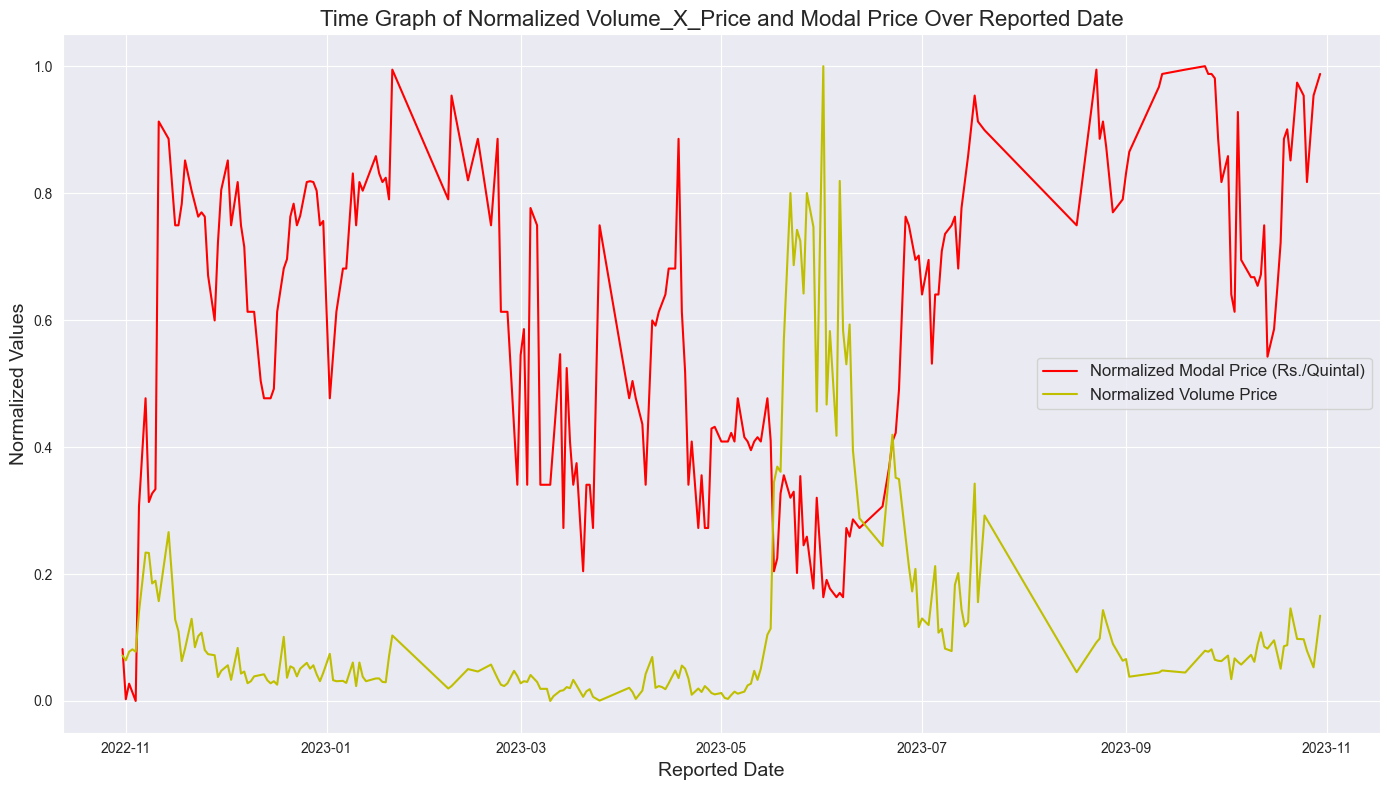

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ensure Reported Date is in datetime format
filtered_df2['Reported Date'] = pd.to_datetime(filtered_df2['Reported Date'], errors='coerce')

# Drop rows where Reported Date might have failed to convert
filtered_df2.dropna(subset=['Reported Date'], inplace=True)

# Sort by date for proper plotting
filtered_df2.sort_values(by='Reported Date', inplace=True)
filtered_df2['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df2[['Modal Price (Rs./Quintal)']])
filtered_df2['Normalized_Volume_Price'] = scaler.fit_transform(filtered_df2[['Arrivals (Tonnes)']])
plt.figure(figsize=(14, 8))
# Plot Reported Date vs Normalized Modal Price
plt.plot(
    filtered_df2['Reported Date'],
    filtered_df2['Normalized_Modal_Price'], color='r',
    label='Normalized Modal Price (Rs./Quintal)'
)
plt.plot(
    filtered_df2['Reported Date'],
    filtered_df2['Normalized_Volume_Price'], color='y',
    label='Normalized Volume Price'
)
# Add title and labels
plt.title('Time Graph of Normalized Volume_X_Price and Modal Price Over Reported Date', fontsize=16)
plt.xlabel('Reported Date', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Optimize layout and show
plt.tight_layout()
plt.show()


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/457836858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3['Reported Date'] = pd.to_datetime(filtered_df3['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/457836858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/457836858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

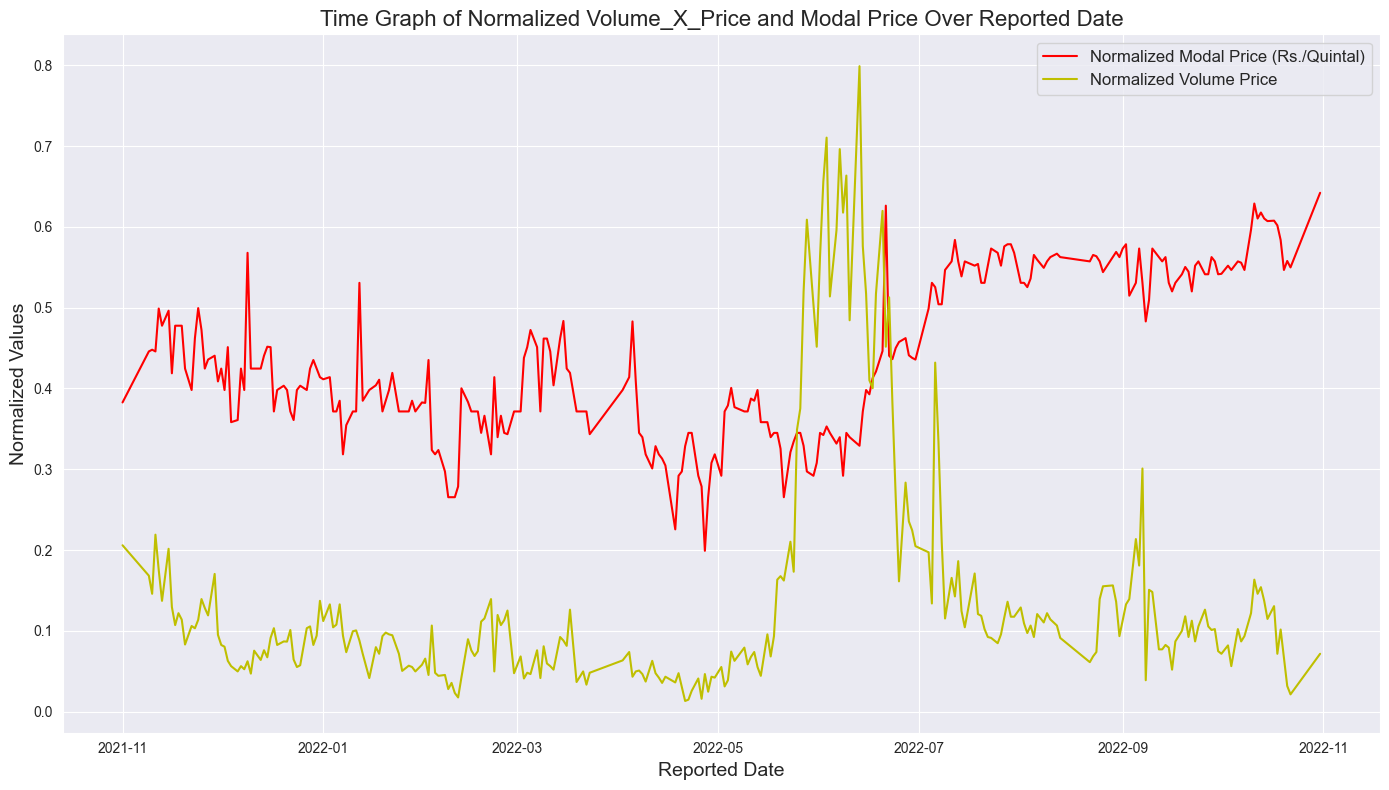

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ensure Reported Date is in datetime format
filtered_df3['Reported Date'] = pd.to_datetime(filtered_df3['Reported Date'], errors='coerce')

# Drop rows where Reported Date might have failed to convert
filtered_df3.dropna(subset=['Reported Date'], inplace=True)

# Sort by date for proper plotting
filtered_df3.sort_values(by='Reported Date', inplace=True)

# Set figure size
plt.figure(figsize=(14, 8))  # Width = 14, Height = 8

# Plot Reported Date vs Normalized Modal Price
plt.plot(
    filtered_df3['Reported Date'],
    filtered_df3['Normalized_Modal_Price'], color='r',
    label='Normalized Modal Price (Rs./Quintal)'
)
plt.plot(
    filtered_df3['Reported Date'],
    filtered_df3['Normalized_Volume_Price'], color='y',
    label='Normalized Volume Price'
)

# Add title and labels
plt.title('Time Graph of Normalized Volume_X_Price and Modal Price Over Reported Date', fontsize=16)
plt.xlabel('Reported Date', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Optimize layout and show
plt.tight_layout()
plt.show()


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/3302886477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df4['Reported Date'] = pd.to_datetime(filtered_df4['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/3302886477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df4.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/3302886477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

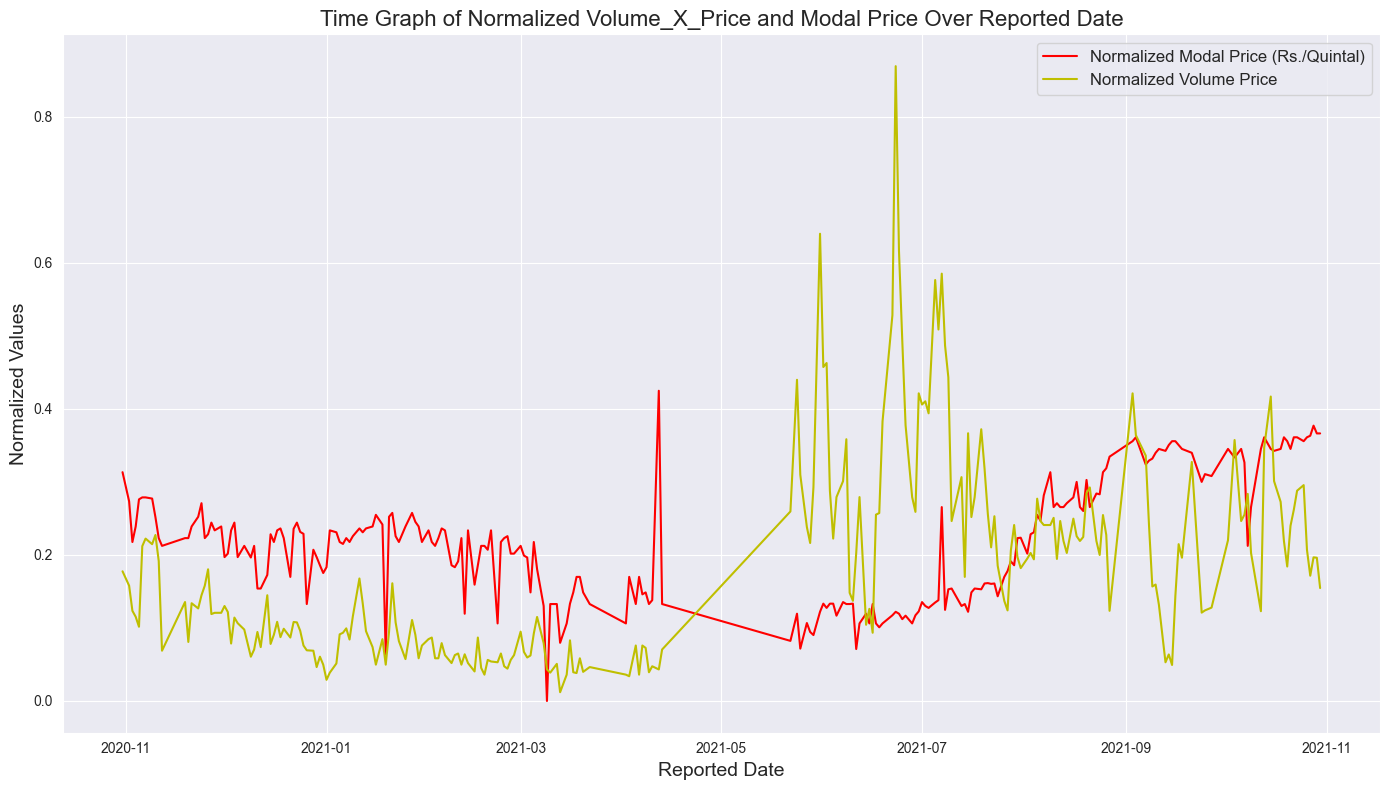

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ensure Reported Date is in datetime format
filtered_df4['Reported Date'] = pd.to_datetime(filtered_df4['Reported Date'], errors='coerce')

# Drop rows where Reported Date might have failed to convert
filtered_df4.dropna(subset=['Reported Date'], inplace=True)

# Sort by date for proper plotting
filtered_df4.sort_values(by='Reported Date', inplace=True)

# Normalize Volume_X_Price, Modal Price, and Arrivals (Tonnes

# Set figure size
plt.figure(figsize=(14, 8))  # Width = 14, Height = 8

# Plot Reported Date vs Normalized Modal Price
plt.plot(
    filtered_df4['Reported Date'],
    filtered_df4['Normalized_Modal_Price'], color='r',
    label='Normalized Modal Price (Rs./Quintal)'
)
plt.plot(
    filtered_df4['Reported Date'],
    filtered_df4['Normalized_Volume_Price'], color='y',
    label='Normalized Volume Price'
)

# Add title and labels
plt.title('Time Graph of Normalized Volume_X_Price and Modal Price Over Reported Date', fontsize=16)
plt.xlabel('Reported Date', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Optimize layout and show
plt.tight_layout()
plt.show()


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/305657753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df5['Reported Date'] = pd.to_datetime(filtered_df5['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/305657753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df5.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/305657753.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

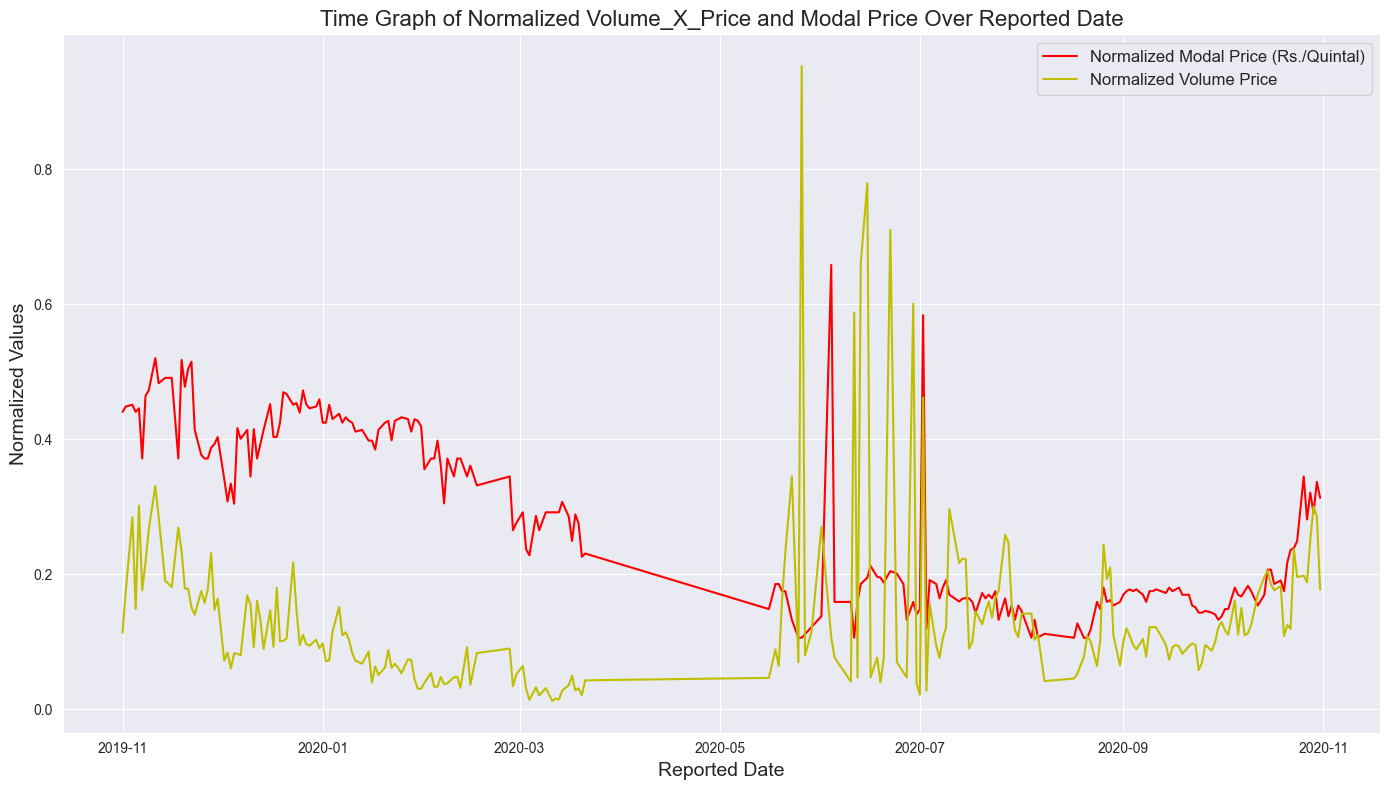

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ensure Reported Date is in datetime format
filtered_df5['Reported Date'] = pd.to_datetime(filtered_df5['Reported Date'], errors='coerce')

# Drop rows where Reported Date might have failed to convert
filtered_df5.dropna(subset=['Reported Date'], inplace=True)

# Sort by date for proper plotting
filtered_df5.sort_values(by='Reported Date', inplace=True)

# Normalize Volume_X_Price, Modal Price, and Arrivals (Tonnes

# Set figure size
plt.figure(figsize=(14, 8))  # Width = 14, Height = 8

# Plot Reported Date vs Normalized Modal Price
plt.plot(
    filtered_df5['Reported Date'],
    filtered_df5['Normalized_Modal_Price'], color='r',
    label='Normalized Modal Price (Rs./Quintal)'
)
plt.plot(
    filtered_df5['Reported Date'],
    filtered_df5['Normalized_Volume_Price'], color='y',
    label='Normalized Volume Price'
)

# Add title and labels
plt.title('Time Graph of Normalized Volume_X_Price and Modal Price Over Reported Date', fontsize=16)
plt.xlabel('Reported Date', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Optimize layout and show
plt.tight_layout()
plt.show()


In [22]:
# from PIL import Image
# import os
# 
# # List of image filenames (adjust filenames as per your requirement)
# image_files = [
#     "price_volume/2019-20.png", "price_volume/2020-21.png", "price_volume/2021-22.png", "price_volume/2022-23.png", "price_volume/2023-24.png"
# ]
# 
# # Load images into a list
# images = [Image.open(img) for img in image_files]
# 
# # Calculate the total height and maximum width of the combined image
# widths, heights = zip(*(img.size for img in images))
# total_height = sum(heights)
# max_width = max(widths)
# 
# # Create a blank canvas with the total height and max width
# combined_image = Image.new("RGB", (max_width, total_height))
# 
# # Paste each image below the previous one
# y_offset = 0
# for img in images:
#     combined_image.paste(img, (0, y_offset))
#     y_offset += img.height
# 
# # Show the combined image
# combined_image.show()
# 
# # Optionally, save the combined image
# combined_image.save("combined_image.png")


In [23]:
df_state = pd.read_csv("VolumeData/cleaned_spice_price_data.csv")

In [24]:
# Get all unique Market Names
df_state_gujarat = df_state[df_state['State Name']=="Gujarat"]
unique_market_names = df_state_gujarat['Market Name'].unique()

# Get the count of unique Market Names
num_unique_market_names = len(unique_market_names)

# Display the results
print("Unique Market Names in Gujarat:")
print(unique_market_names)
print(f"\nNumber of Unique Market Names: {num_unique_market_names}")


Unique Market Names in Gujarat:
['Mansa' 'Amreli' 'Rajula' 'Jam Jodhpur' 'Visavadar' 'Morbi' 'Savarkundla'
 'Junagadh' 'Jasdan' 'Dahod' 'Mahuva(Station Road)' 'Bhavnagar' 'Rajkot'
 'Halvad' 'Gondal' 'Botad' 'Upleta' 'Khambha' 'Kadi' 'Porbandar'
 'Dasada Patadi' 'Dhoraji' 'S.Mandvi' 'Mandvi' 'Bhanvad' 'Siddhpur'
 'Palitana' 'Babra' 'Modasa' 'Dhansura' 'Chotila' 'Jetpur(Dist.Rajkot)'
 'Taleja' 'Himatnagar' 'Lakhani' 'Rapar' 'Una' 'Dhari' 'Bagasara'
 'Veraval' 'Dhragradhra' 'Deesa']

Number of Unique Market Names: 42


In [25]:
# Using .loc to modify columns explicitly and avoid SettingWithCopyWarning
df_state_gujarat.loc[:, 'Arrivals (Tonnes)'] = (
    df_state_gujarat['Arrivals (Tonnes)']
    .astype(str)  # Convert to string
    .str.replace(',', '', regex=True)  # Remove commas
    .astype(float)  # Convert back to float
)

df_state_gujarat.loc[:, 'Modal Price (Rs./Quintal)'] = (
    df_state_gujarat['Modal Price (Rs./Quintal)']
    .astype(str)  # Convert to string
    .str.replace(',', '', regex=True)  # Remove commas
    .astype(float)  # Convert back to float
)

# Grouping by 'Market Name' and applying the required aggregations
result_gujarat = df_state_gujarat.groupby('Market Name').agg({
    'Arrivals (Tonnes)': 'sum',
    'Modal Price (Rs./Quintal)': 'mean'
}).reset_index()

# Adding a new column 'State' with all values as 'Gujarat'
result_gujarat['State'] = 'Gujarat'

# Displaying the resulting DataFrame
print(result_gujarat)


             Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)    State
0                 Amreli           79585.1               10673.324538  Gujarat
1                  Babra            948.17               10229.263374  Gujarat
2               Bagasara              17.0               13928.179487  Gujarat
3                Bhanvad             141.2                6969.230769  Gujarat
4              Bhavnagar           9592.88               10640.290237  Gujarat
5                  Botad           22806.0                9290.321101  Gujarat
6                Chotila              40.2               13500.000000  Gujarat
7                  Dahod             434.6                9007.581967  Gujarat
8          Dasada Patadi             164.0                9207.870370  Gujarat
9                  Deesa              24.4               11228.571429  Gujarat
10              Dhansura              40.5                8412.826087  Gujarat
11                 Dhari              60.7          

In [26]:
# Get all unique Market Names
df_state_mp = df_state[df_state['State Name']=="Madhya Pradesh"]
unique_market_names = df_state_mp['Market Name'].unique()

# Get the count of unique Market Names
num_unique_market_names = len(unique_market_names)

# Display the results
print("Unique Market Names in Madhya Pradesh:")
print(unique_market_names)
print(f"\nNumber of Unique Market Names: {num_unique_market_names}")


Unique Market Names in Madhya Pradesh:
['Neemuch' 'Sheopurkalan' 'LavKush Nagar(Laundi)' 'Ujjain' 'Kailaras'
 'Lashkar' 'Rajnagar' 'Datia' 'Dabra' 'Niwadi' 'Naugaon' 'Sevda'
 'Ajaygarh' 'Barad' 'Sidhi' 'Amarpatan' 'Mehar' 'Alampur' 'Bijawar'
 'Pohari' 'Shahagarh' 'Lateri' 'Banapura' 'Panna' 'Garhakota' 'Katni'
 'Chhatarpur' 'Beohari' 'Sabalgarh']

Number of Unique Market Names: 29


In [27]:
# Using .loc to explicitly modify the columns
df_state_mp.loc[:, 'Arrivals (Tonnes)'] = df_state_mp['Arrivals (Tonnes)'].astype(float)
df_state_mp.loc[:, 'Modal Price (Rs./Quintal)'] = df_state_mp['Modal Price (Rs./Quintal)'].astype(float)

# Grouping by 'Market Name' and applying the required aggregations
result_mp = df_state_mp.groupby('Market Name').agg({
    'Arrivals (Tonnes)': 'sum',
    'Modal Price (Rs./Quintal)': 'mean'
}).reset_index()

# Displaying the result
result_mp['State'] = 'Madhya Pradesh'
print(result_mp)

              Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)  \
0                Ajaygarh           6327.01                9681.179903   
1                 Alampur             712.4               10883.563830   
2               Amarpatan              0.48                8900.000000   
3                Banapura              67.7                6919.187500   
4                   Barad              39.0                9355.222222   
5                 Beohari             10.52               12450.000000   
6                 Bijawar           1104.41                9216.919192   
7              Chhatarpur             57.25               13550.000000   
8                   Dabra            1305.1                9374.909605   
9                   Datia            1419.7               10036.769663   
10              Garhakota               3.8                6650.000000   
11               Kailaras            2203.6                9814.878788   
12                  Katni            1

In [28]:
# Get all unique Market Names
df_state_karnataka = df_state[df_state['State Name']=="Karnataka"]
unique_market_names = df_state_karnataka['Market Name'].unique()

# Get the count of unique Market Names
num_unique_market_names = len(unique_market_names)

# Display the results
print("Unique Market Names in Karnataka:")
print(unique_market_names)
print(f"\nNumber of Unique Market Names: {num_unique_market_names}")


Unique Market Names in Karnataka:
['Kalburgi' 'Lingasugur' 'Bangalore' 'Kustagi' 'Basava Kalayana'
 'Bagalakot']

Number of Unique Market Names: 6


In [29]:
# Using .loc to explicitly modify the columns
df_state_karnataka.loc[:, 'Arrivals (Tonnes)'] = df_state_karnataka['Arrivals (Tonnes)'].astype(float)
df_state_karnataka.loc[:, 'Modal Price (Rs./Quintal)'] = df_state_karnataka['Modal Price (Rs./Quintal)'].astype(float)

# Grouping by 'Market Name' and applying the required aggregations
result_karnataka = df_state_karnataka.groupby('Market Name').agg({
    'Arrivals (Tonnes)': 'sum',
    'Modal Price (Rs./Quintal)': 'mean'
}).reset_index()
result_karnataka['State'] = 'Karnataka'
print(result_karnataka)


       Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)      State
0        Bagalakot              41.0                4876.000000  Karnataka
1        Bangalore            2127.0               12696.971429  Karnataka
2  Basava Kalayana              39.0                7321.228571  Karnataka
3         Kalburgi            2854.0                9854.576803  Karnataka
4          Kustagi            2334.0                9104.652174  Karnataka
5       Lingasugur            1093.0               10502.931034  Karnataka


In [30]:
# Get all unique Market Names
df_state_telangana = df_state[df_state['State Name']=="Telangana"]
unique_market_names = df_state_telangana['Market Name'].unique()

# Get the count of unique Market Names
num_unique_market_names = len(unique_market_names)

# Display the results
print("Unique Market Names in telangana:")
print(unique_market_names)
print(f"\nNumber of Unique Market Names: {num_unique_market_names}")


Unique Market Names in telangana:
['Warangal']

Number of Unique Market Names: 1


In [31]:
# Using .loc to explicitly modify the columns
df_state_telangana.loc[:, 'Arrivals (Tonnes)'] = df_state_telangana['Arrivals (Tonnes)'].astype(float)
df_state_telangana.loc[:, 'Modal Price (Rs./Quintal)'] = df_state_telangana['Modal Price (Rs./Quintal)'].astype(float)

# Grouping by 'Market Name' and applying the required aggregations
result_telangana = df_state_telangana.groupby('Market Name').agg({
    'Arrivals (Tonnes)': 'sum',
    'Modal Price (Rs./Quintal)': 'mean'
}).reset_index()
result_telangana['State'] = 'Telangana'
print(result_telangana)


  Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)      State
0    Warangal           1313.14               11484.532213  Telangana


In [32]:
# Get all unique Market Names
df_state_mh = df_state[df_state['State Name']=="Maharashtra"]
unique_market_names = df_state_mh['Market Name'].unique()

# Get the count of unique Market Names
num_unique_market_names = len(unique_market_names)

# Display the results
print("Unique Market Names in telangana:")
print(unique_market_names)
print(f"\nNumber of Unique Market Names: {num_unique_market_names}")


Unique Market Names in telangana:
['Chopada' 'Kille Dharur' 'Bhokar' 'Dharmabad' 'Digras' 'Khamgaon'
 'Ahmedpur' 'Kalamb (Dharashiv)' 'Shegaon' 'Udgir' 'Balapur' 'Gevrai'
 'Mantha' 'Beed' 'Aarni' 'Paithan' 'Amarawati' 'Malegaon' 'Amalner'
 'Washim' 'Sakri' 'Majalgaon']

Number of Unique Market Names: 22


In [33]:
# Using .loc to explicitly modify the columns
df_state_mh.loc[:, 'Arrivals (Tonnes)'] = df_state_mh['Arrivals (Tonnes)'].astype(float)
df_state_mh.loc[:, 'Modal Price (Rs./Quintal)'] = df_state_mh['Modal Price (Rs./Quintal)'].astype(float)

# Grouping by 'Market Name' and applying the required aggregations
result_mh = df_state_mh.groupby('Market Name').agg({
    'Arrivals (Tonnes)': 'sum',
    'Modal Price (Rs./Quintal)': 'mean'
}).reset_index()
result_mh['State'] = 'Maharashtra'
print(result_mh)


           Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)  \
0                Aarni             102.0                9946.428571   
1             Ahmedpur              26.0               10136.000000   
2              Amalner               4.0               11000.000000   
3            Amarawati             562.2               10123.676471   
4              Balapur              11.0               10107.727273   
5                 Beed               7.0                9658.000000   
6               Bhokar            1515.0                8901.187943   
7              Chopada             110.0                8788.274725   
8            Dharmabad             313.0                9257.981651   
9               Digras               4.3                9727.500000   
10              Gevrai              10.1                9214.333333   
11  Kalamb (Dharashiv)               2.0                8455.500000   
12            Khamgaon             521.2                9783.307116   
13    

In [34]:
list_results = [result_gujarat, result_mp, result_karnataka, result_telangana, result_mh]
# Combine all DataFrames in the list into a single DataFrame
combined_result = pd.concat(list_results, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_result.to_csv('combined_results.csv', index=False)

# Display the first few rows of the combined DataFrame
print(combined_result.head())


  Market Name Arrivals (Tonnes)  Modal Price (Rs./Quintal)    State
0      Amreli           79585.1               10673.324538  Gujarat
1       Babra            948.17               10229.263374  Gujarat
2    Bagasara              17.0               13928.179487  Gujarat
3     Bhanvad             141.2                6969.230769  Gujarat
4   Bhavnagar           9592.88               10640.290237  Gujarat


In [35]:
# Display all unique values in the 'State Name' column
unique_states = df['State Name'].unique()

# Print the unique values
print(unique_states)


['Gujarat' 'Uttar Pradesh' 'Madhya Pradesh' 'Karnataka' 'Tamil Nadu'
 'Maharashtra' 'Telangana' 'Rajasthan']


In [36]:
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Volume_X_Price
0,Gujarat,Gandhinagar,Mansa,White,Oil Seeds,0.06,10750,11355,10900.0,2019-01-01,654.0
1,Uttar Pradesh,Kanpur Dehat,Jhijhank,White,Oil Seeds,0.50,6049,6249,6149.0,2019-01-01,3074.5
2,Uttar Pradesh,Hamirpur,Muskara,White,Oil Seeds,3.00,10600,11300,11000.0,2019-01-01,33000.0
3,Gujarat,Amreli,Amreli,White,Oil Seeds,10.00,6500,13435,12860.0,2019-01-01,128600.0
4,Gujarat,Amreli,Rajula,White,Oil Seeds,0.20,11270,12500,11885.0,2019-01-01,2377.0
...,...,...,...,...,...,...,...,...,...,...,...
32343,Gujarat,Bhavnagar,Mahuva(Station Road),White,Oil Seeds,3.00,9000,13240,11500.0,2024-11-13,34500.0
32344,Uttar Pradesh,Jalaun (Orai),Orai,White,Oil Seeds,20.00,10800,11500,11000.0,2024-11-13,220000.0
32345,Uttar Pradesh,Jalaun (Orai),Jalaun,White,Oil Seeds,10.00,10800,11500,11200.0,2024-11-13,112000.0
32346,Gujarat,Amreli,Bagasara,White,Oil Seeds,0.80,11075,11650,11362.0,2024-11-13,9089.6


In [40]:
market_lists = ["Rajkot", "Gondal", "Amreli", "Halvad", "Rajnagar", "Naugaon", "LavKush Nagar(Laundi)", "Kalburgi"]

In [46]:
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Volume_X_Price
0,Gujarat,Gandhinagar,Mansa,White,Oil Seeds,0.06,10750,11355,10900.0,2019-01-01,654.0
1,Uttar Pradesh,Kanpur Dehat,Jhijhank,White,Oil Seeds,0.50,6049,6249,6149.0,2019-01-01,3074.5
2,Uttar Pradesh,Hamirpur,Muskara,White,Oil Seeds,3.00,10600,11300,11000.0,2019-01-01,33000.0
3,Gujarat,Amreli,Amreli,White,Oil Seeds,10.00,6500,13435,12860.0,2019-01-01,128600.0
4,Gujarat,Amreli,Rajula,White,Oil Seeds,0.20,11270,12500,11885.0,2019-01-01,2377.0
...,...,...,...,...,...,...,...,...,...,...,...
32343,Gujarat,Bhavnagar,Mahuva(Station Road),White,Oil Seeds,3.00,9000,13240,11500.0,2024-11-13,34500.0
32344,Uttar Pradesh,Jalaun (Orai),Orai,White,Oil Seeds,20.00,10800,11500,11000.0,2024-11-13,220000.0
32345,Uttar Pradesh,Jalaun (Orai),Jalaun,White,Oil Seeds,10.00,10800,11500,11200.0,2024-11-13,112000.0
32346,Gujarat,Amreli,Bagasara,White,Oil Seeds,0.80,11075,11650,11362.0,2024-11-13,9089.6


In [47]:

def normalise(market_lists, df):
    normalised_df_list = {}
    for i in market_lists:
        # Filter the DataFrame for the current market
        filtered_df = df[df['Market Name'] == i]

        # Normalize the required columns
        scaler = MinMaxScaler()
        filtered_df['Normalized_Volume_X_Price'] = scaler.fit_transform(filtered_df[['Volume_X_Price']])
        filtered_df['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df[['Modal Price (Rs./Quintal)']])
        filtered_df['Normalized_Volume_Price'] = scaler.fit_transform(filtered_df[['Arrivals (Tonnes)']])

        # Add the filtered DataFrame to the normalised_df_list
        normalised_df_list[i] = filtered_df

        # Ensure 'Reported Date' is in datetime format and sort the DataFrame
        filtered_df['Reported Date'] = pd.to_datetime(filtered_df['Reported Date'], errors='coerce')
        filtered_df.sort_values(by='Reported Date', ascending=True, inplace=True)

        # Get the last date (latest date)
        last_date = filtered_df['Reported Date'].iloc[-1]  # The last row in the sorted DataFrame

        # Print the last date for the current market place
        print(f"Market: {i}, Last Reported Date: {last_date}")

    return normalised_df_list

In [49]:
normalised_df_list = normalise(market_lists, df)
normalised_df_list

Market: Rajkot, Last Reported Date: 2024-11-13 00:00:00
Market: Gondal, Last Reported Date: 2024-11-09 00:00:00
Market: Amreli, Last Reported Date: 2024-11-13 00:00:00
Market: Halvad, Last Reported Date: 2024-11-13 00:00:00
Market: Rajnagar, Last Reported Date: 2024-11-11 00:00:00
Market: Naugaon, Last Reported Date: 2023-12-07 00:00:00
Market: LavKush Nagar(Laundi), Last Reported Date: 2024-11-13 00:00:00
Market: Kalburgi, Last Reported Date: 2024-11-13 00:00:00


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/727901647.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Normalized_Volume_X_Price'] = scaler.fit_transform(filtered_df[['Volume_X_Price']])
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/727901647.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df[['Modal Price (Rs./Quintal)']])
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipyker

{'Rajkot':       State Name District Name Market Name Variety      Group  \
 19       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 46       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 81       Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 114      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 132      Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 ...          ...           ...         ...     ...        ...   
 32192    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 32213    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 32266    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 32316    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 32342    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
 
        Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
 19                  30.0                    10800                    12810   
 46                  98.0             

In [42]:
def partition(normalised_df_list):
    yearwise_df = {}
    for market_place, filtered_df in normalised_df_list.items():
        start_date = '2023-10-31'
        end_date = '2024-10-31'
        
        # Filter the DataFrame for rows within the date range
        filtered_df1 = filtered_df[
            (filtered_df['Reported Date'] >= start_date) &
            (filtered_df['Reported Date'] <= end_date)
            ]
        
        start_date = '2022-10-31'
        end_date = '2023-10-31'
        
        filtered_df2 = filtered_df[
            (filtered_df['Reported Date'] >= start_date) &
            (filtered_df['Reported Date'] <= end_date)
            ]
        
        start_date = '2021-10-31'
        end_date = '2022-10-31'
        filtered_df3 = filtered_df[
            (filtered_df['Reported Date'] >= start_date) &
            (filtered_df['Reported Date'] <= end_date)
            ]
        
        start_date = '2020-10-31'
        end_date = '2021-10-31'
        filtered_df4 = filtered_df[
            (filtered_df['Reported Date'] >= start_date) &
            (filtered_df['Reported Date'] <= end_date)
            ]
        
        start_date = '2019-10-31'
        end_date = '2020-10-31'
        filtered_df5 = filtered_df[
            (filtered_df['Reported Date'] >= start_date) &
            (filtered_df['Reported Date'] <= end_date)
            ]
        yearwise_df[market_place] = [filtered_df1,filtered_df2,filtered_df3,filtered_df4,filtered_df5]
    return yearwise_df
        

In [43]:
yearwise_df = partition(normalised_df_list)
yearwise_df

{'Rajkot': [      State Name District Name Market Name Variety      Group  \
  31174    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31209    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31318    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31347    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31369    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31506    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31513    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31540    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31573    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31621    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31627    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31646    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31677    Gujarat        Rajkot      Rajkot   White  Oil Seeds   
  31699    Gujarat        Rajkot      Rajkot   White

In [44]:
for i, j in yearwise_df.items():
    print(i)

Rajkot
Gondal
Amreli
Halvad
Rajnagar
Naugaon
LavKush Nagar(Laundi)
Kalburgi


In [53]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming scaler is defined elsewhere in your code
scaler = MinMaxScaler()

def plot_and_save(filtered_df, market_place, year, save_dir):
    # Ensure Reported Date is in datetime format
    filtered_df['Reported Date'] = pd.to_datetime(filtered_df['Reported Date'], errors='coerce')

    # Drop rows where Reported Date might have failed to convert
    filtered_df.dropna(subset=['Reported Date'], inplace=True)

    # Sort by date for proper plotting
    filtered_df.sort_values(by='Reported Date', inplace=True)

    # Set figure size
    plt.figure(figsize=(14, 8))  # Width = 14, Height = 8
    filtered_df['Normalized_Modal_Price'] = scaler.fit_transform(filtered_df[['Modal Price (Rs./Quintal)']])
    filtered_df['Normalized_Volume_Price'] = scaler.fit_transform(filtered_df[['Arrivals (Tonnes)']])

    # Plot Reported Date vs Normalized Modal Price
    plt.plot(
        filtered_df['Reported Date'],
        filtered_df['Normalized_Modal_Price'], color='r',
        label='Normalized Modal Price (Rs./Quintal)'
    )
    plt.plot(
        filtered_df['Reported Date'],
        filtered_df['Normalized_Volume_Price'], color='y',
        label='Normalized Volume Price'
    )

    # Add title and labels
    plt.title(f'Time Graph of Normalized Volume_X_Price and Modal Price ({year})', fontsize=16)
    plt.xlabel('Reported Date', fontsize=14)
    plt.ylabel('Normalized Values', fontsize=14)

    # Add grid and legend
    plt.grid(True)
    plt.legend(fontsize=12)

    # Optimize layout and save the plot
    plt.tight_layout()
    # Save the plot as an image file
    file_path = os.path.join(save_dir, f'{market_place}_{year}_plot.png')
    plt.savefig(file_path)
    plt.close()  # Close the plot to avoid memory issues

def partition_and_plot(normalised_df_list):
    yearwise_df = {}

    # Directory to save plots
    base_dir = "marketplace_plots"
    os.makedirs(base_dir, exist_ok=True)

    for market_place, filtered_df in normalised_df_list.items():
        # Create a directory for the market place
        market_place_dir = os.path.join(base_dir, market_place)
        os.makedirs(market_place_dir, exist_ok=True)

        # Year ranges for filtering
        year_ranges = [
            ('2023-10-31', None),  # No end date for the first year
            ('2022-10-31', '2023-10-31'),
            ('2021-10-31', '2022-10-31'),
            ('2020-10-31', '2021-10-31'),
            ('2019-10-31', '2020-10-31')
        ]

        # Iterate over each year range and plot the graph
        for i, (start_date, end_date) in enumerate(year_ranges, 1):
            if end_date is None:
                # For the first year range, no end date, plot all data starting from the start date
                filtered_df_year = filtered_df[
                    (filtered_df['Reported Date'] >= start_date)
                ]
            else:
                # For other ranges, apply the date filter with both start and end date
                filtered_df_year = filtered_df[
                    (filtered_df['Reported Date'] >= start_date) &
                    (filtered_df['Reported Date'] <= end_date)
                    ]

            # Plot and save the graph for the filtered DataFrame
            plot_and_save(filtered_df_year, market_place, f'Year_{i}', market_place_dir)

    print("Plots saved successfully.")
    return yearwise_df

# Call the function
partition_and_plot(normalised_df_list)


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Reported Date'] = pd.to_datetime(filtered_df['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Plots saved successfully.


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Reported Date'] = pd.to_datetime(filtered_df['Reported Date'], errors='coerce')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Reported Date'], inplace=True)
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_18758/978048378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

{}